The rise of Internet of Things (IoT) devices has introduced new security challenges, with IoT networks becoming targets for cyber-attacks.To address this, effective intrusion detection systems (IDS) are crucial. The IoTID20 dataset provides a valuable resource for studying IoT attacks. However, its high dimensionality poses computational challenges, especially for resource-constrained IoT devices. Dimensionality reduction techniques like PCA and LDA can help mitigate this challenge, making machine learning algorithms feasible for deployment. This project explores the impact of dimensionality reduction on SVM classifiers using the IoTID20 dataset, aiming to balance computational efficiency and classification accuracy. It also proposes a novel technique for optimizing this balance. Ultimately, this project contributes to enhancing IoT security by providing insights into machine learning-based intrusion detection systems and their practical deployment in IoT environments.

In [ ]:
import pandas as pd
import numpy as np
import struct, socket, warnings

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline

In [ ]:
warnings.filterwarnings("ignore")  # Ignore all warnings
pd.set_option('display.max_columns', None)  # Display all columns

# I - Read Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dir_path = '/content/drive/MyDrive/computation data/'

Mounted at /content/drive


In [ ]:
data_path = dir_path + 'IoT Network Intrusion Dataset.csv'
# data_path = r'data/IoT Network Intrusion Dataset.csv'

df = pd.read_csv(data_path)
df.head(15)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,3.216000e+07,26666.666667,75.000000,0.000000,75.0,75.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,8,8,13333.333333,13333.333333,982.0,1430.0,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.000000,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,564.971751,2655.000000,2261.327486,4254.0,1056.0,0.0,0.000000,0.000000,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,0,0,0,20,44,188.323917,376.647834,0.0,0.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,0,0,0,1,0,2,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.000000,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,1.990071e+07,21276.595745,70.500000,0.707107,71.0,70.0,0.0,0.000000,0.000000,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,0,0,0,96,0.000000,21276.595745,30.0,1388.0,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,0,0,0,3,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.500000,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,1.838411e+07,13245.033113,151.000000,0.000000,151.0,151.0,0.0,0.000000,0.000000,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,0,0,0,64,0.000000,13245.033113,1388.0,1388.0,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.000000,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,8.535948e+06,19607.843137,76.500000,0.707107,77.0,76.0,76.0,76.000000,0.000000,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,16,8,13071.895425,6535.947712,420.0,452.0,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,0,0,0,2,886,1,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.500000,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
5,192.168.0.24-101.79.244.148-41980-443-6,192.168.0.24,41980,101.79.244.148,443,6,10/09/2019 01:39:13 AM,157,2,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0000

# II - EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 86 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            625783 non-null  object 
 1   Src_IP             625783 non-null  object 
 2   Src_Port           625783 non-null  int64  
 3   Dst_IP             625783 non-null  object 
 4   Dst_Port           625783 non-null  int64  
 5   Protocol           625783 non-null  int64  
 6   Timestamp          625783 non-null  object 
 7   Flow_Duration      625783 non-null  int64  
 8   Tot_Fwd_Pkts       625783 non-null  int64  
 9   Tot_Bwd_Pkts       625783 non-null  int64  
 10  TotLen_Fwd_Pkts    625783 non-null  float64
 11  TotLen_Bwd_Pkts    625783 non-null  float64
 12  Fwd_Pkt_Len_Max    625783 non-null  float64
 13  Fwd_Pkt_Len_Min    625783 non-null  float64
 14  Fwd_Pkt_Len_Mean   625783 non-null  float64
 15  Fwd_Pkt_Len_Std    625783 non-null  float64
 16  Bw

## Data Visualization

### Exploring target data

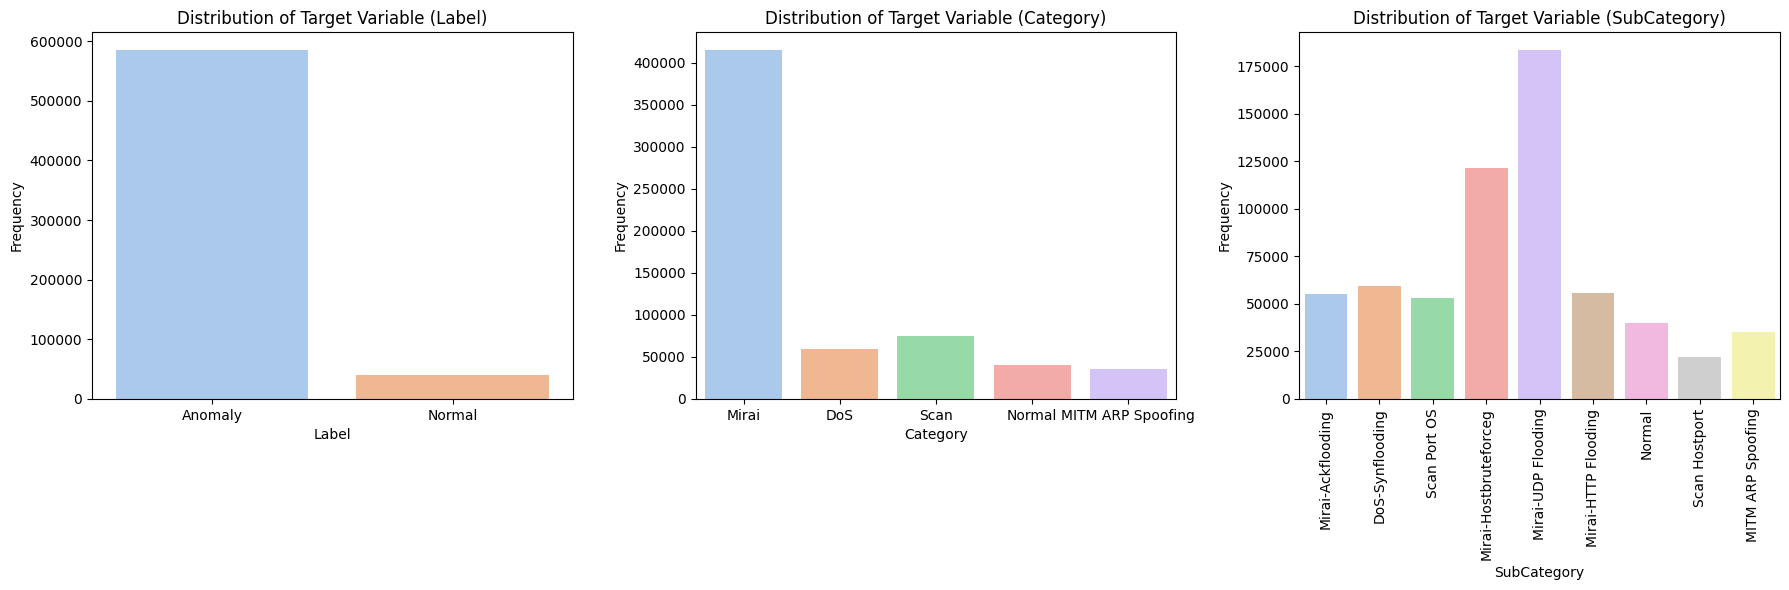

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting the distribution of the target variable 'label'
sns.countplot(data=df, x='Label', palette='pastel', ax=axes[0])
axes[0].set_title('Distribution of Target Variable (Label)')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Frequency')

# Plotting the distribution of the target variable 'Cat'
sns.countplot(data=df, x='Cat', palette='pastel', ax=axes[1])
axes[1].set_title('Distribution of Target Variable (Category)')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Frequency')

# Plotting the distribution of the target variable 'Sub_Cat'
sns.countplot(data=df, x='Sub_Cat', palette='pastel', ax=axes[2])
axes[2].set_title('Distribution of Target Variable (SubCategory)')
axes[2].set_xlabel('SubCategory')
axes[2].set_ylabel('Frequency')

# Rotate labels vertically for the 'Sub_Cat' plot
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()



### Protocol Number Distribution

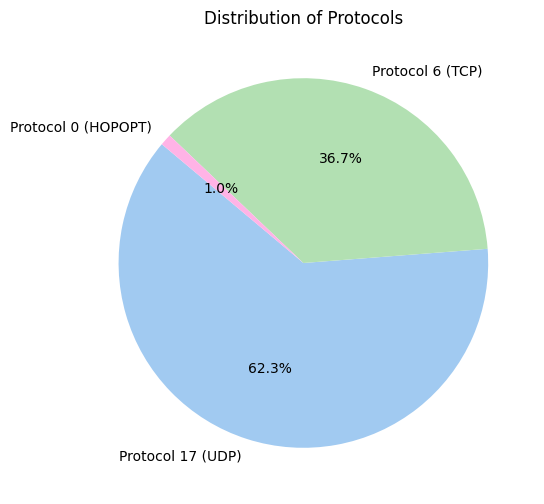

In [ ]:
# Count the frequency of each protocol
protocol_counts = df['Protocol'].value_counts()

# Extract the protocol labels from the DataFrame
labels = df['Protocol'].unique()

# Define protocol names
protocols = {'0': 'HOPOPT', '6': 'TCP', '17': 'UDP'}

# Add text to labels
labels_with_text = [f'Protocol {label} ({protocols[str(label)]})' for label in labels]

# Define custom pastel colors for the pie chart
colors = ['#a1caf1', '#b2e0b2', '#ffb3e6']  # Pastel blue, pastel green, and pastel pink

# Create a pie chart to visualize the distribution of protocols
plt.figure(figsize=(6, 6))
plt.pie(protocol_counts, labels=labels_with_text, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Protocols')
plt.show()

###  Top 10 most frequent source and Destination IP addresses.

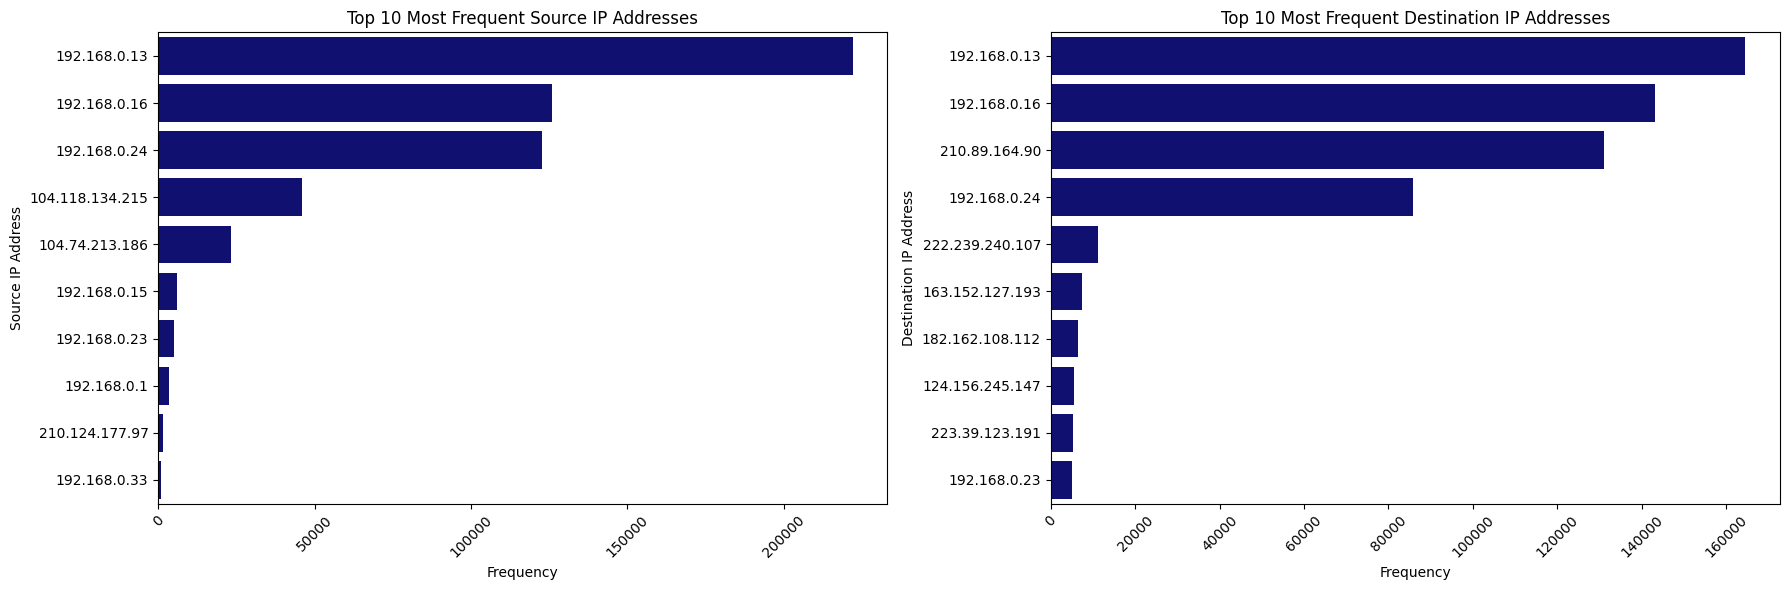

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Bar plot showing the frequency of each source IP address
sns.countplot(df['Src_IP'].astype(str), order=(df['Src_IP'].astype(str)).value_counts().index[:10], ax=axes[0], color='navy')
axes[0].set_title('Top 10 Most Frequent Source IP Addresses')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Source IP Address')
axes[0].tick_params(axis='x', rotation=45)

# Bar plot showing the frequency of each destination IP address
sns.countplot(df['Dst_IP'].astype(str), order=(df['Dst_IP'].astype(str)).value_counts().index[:10], ax=axes[1], color='navy')
axes[1].set_title('Top 10 Most Frequent Destination IP Addresses')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Destination IP Address')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

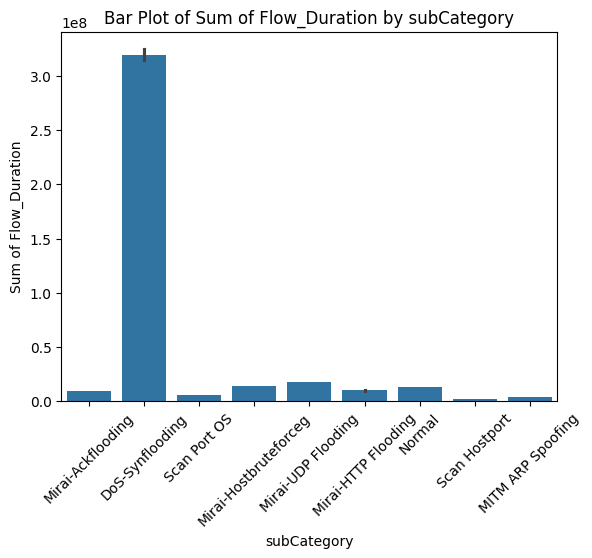

In [ ]:
# Bar plot to show the count or mean of a variable for different categories
sns.barplot(data=df, x='Sub_Cat', y='Flow_Duration', estimator=sum)
plt.title('Bar Plot of Sum of Flow_Duration by subCategory')
plt.xlabel('subCategory')
plt.ylabel('Sum of Flow_Duration')
plt.xticks(rotation=45)
plt.show()

# III - Data Cleaning

## Check for duplicates and null values

In [ ]:
for column in df.columns:
    null_count = df[column].isnull().sum()
    if null_count > 0:
        print(f"Column '{column}' has {null_count} null values.")
print("done")

done


In [ ]:
# To find duplicate rows
duplicate_rows = df[df.duplicated()]

In [ ]:
 # Remove columns with all NaN values
print("Remove columns with NaN values ... ", end="")
null_cols = df.columns[df.isnull().all()].tolist()
df = df.drop(null_cols, axis=1)
print("Done")
#note no nan columns

Remove columns with NaN values ... Done


In [ ]:
print("Convert IP addresses and dates to numerical data ... ", end="")

# Convert IP addresses to 32-bits integers
def convert_ip_to_int(ip):
    """
    Convert IP address to a 32-bit integer.
    Args:
        ip (str): IP address in string format.
    Returns:
        int: 32-bit integer representation of the IP address.
    """
    return struct.unpack("!I", socket.inet_aton(ip))[0]

df["Src_IP"] = df["Src_IP"].apply(convert_ip_to_int)
df["Dst_IP"] = df["Dst_IP"].apply(convert_ip_to_int)

# Convert Timestamp to 64-bits integers
df["Timestamp"] = pd.to_datetime(df["Timestamp"]).astype(np.int64)

print("Done")

Convert IP addresses and dates to numerical data ... Done


## X and Y separation

### X

In [ ]:
# Keep only numerical data
dataframe = df.select_dtypes(include="number")
dataframe

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,3232235533,10000,3232235536,10101,17,1564025153000000000,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,3.216000e+07,26666.666667,75.0,0.000000,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,8,8,13333.333333,13333.333333,982.0,1430.0,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0
1,3735073668,2179,3232235533,554,6,1558908666000000000,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,564.971751,2655.0,2261.327486,4254.0,1056.0,0.0,0.0,0.0,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,0,0,0,20,44,188.323917,376.647834,0.0,0.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,0,0,0,1,0,2,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0
2,3232235536,52727,3232235533,9020,6,1562808288000000000,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,1.990071e+07,21276.595745,70.5,0.707107,71.0,70.0,0.0,0.0,0.0,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,0,0,0,96,0.000000,21276.595745,30.0,1388.0,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,0,0,0,3,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0
3,3232235536,52964,3232235533,9020,6,1567569497000000000,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,1.838411e+07,13245.033113,151.0,0.000000,151.0,151.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,0,0,0,64,0.000000,13245.033113,1388.0,1388.0,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0
4,3232235521,36763,4026531834,1900,17,1568079678000000000,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,8.535948e+06,19607.843137,76.5,0.707107,77.0,76.0,76.0,76.0,0.0,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,16,8,13071.895425,6535.947712,420.0,452.0,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,0,0,0,2,886,1,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,3232235544,56112,3529090138,8043,17,1564025100000000000,277,1,1,18.0,18.0,18.0,18.0,18.0,0.000000,18.0,18.0,18.000000,0.000000,1.299639e+05,7220.216606,277.0,0.000000,277.0,277.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,8,8,3610.108303,3610.108303,18.0,18.0,18.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1.0,27.000000,18.0,18.000000,0,0,0,0,0,0,1,18,

### Replace infinities

In [ ]:
# Replace infinities with column max or min depending on the sign
print("Replace infinities by column max ... ", end="")
# Replace positive infinities with column max
dataframe = dataframe.replace(np.inf, np.nan)
dataframe = dataframe.fillna(dataframe.max())
# Replace negative infinities with column min
dataframe = dataframe.replace(-np.inf, np.nan)
dataframe = dataframe.fillna(dataframe.min())
print("Done")

Replace infinities by column max ... Done


### X correlation with target variable

In [ ]:
X=dataframe
y=df['Label']
y = y.map({'Anomaly': 1, 'Normal': 0})

# Compute the correlation between features and the target variable
correlation_with_label = X.corrwith(y)

# Sort the correlation values
correlation_with_label = correlation_with_label.abs().sort_values(ascending=False)

# Select top N features with highest correlation
N =20  # Number of top features to select
important_features = correlation_with_label.head(N).index.tolist()

# Subset the dataset with important features
data_subset = X[important_features]

print("Selected important features:", important_features)


Selected important features: ['Timestamp', 'Dst_Port', 'Fwd_Pkt_Len_Std', 'ACK_Flag_Cnt', 'Src_Port', 'Protocol', 'Init_Bwd_Win_Byts', 'Pkt_Len_Std', 'TotLen_Fwd_Pkts', 'Subflow_Fwd_Byts', 'Fwd_Pkt_Len_Max', 'Pkt_Len_Var', 'Bwd_Header_Len', 'Fwd_Header_Len', 'Fwd_Seg_Size_Avg', 'Fwd_Pkt_Len_Mean', 'Bwd_Seg_Size_Avg', 'Bwd_Pkt_Len_Mean', 'Pkt_Len_Max', 'Src_IP']


In [ ]:
# Drop the columns that do not logically affect the label
columns_to_drop = ['Timestamp', 'Dst_Port', 'Src_Port', 'Protocol', 'Src_IP']
data_subset.drop(columns=columns_to_drop, inplace=True, errors='ignore')
data_subset.columns

Index(['Fwd_Pkt_Len_Std', 'ACK_Flag_Cnt', 'Init_Bwd_Win_Byts', 'Pkt_Len_Std',
       'TotLen_Fwd_Pkts', 'Subflow_Fwd_Byts', 'Fwd_Pkt_Len_Max', 'Pkt_Len_Var',
       'Bwd_Header_Len', 'Fwd_Header_Len', 'Fwd_Seg_Size_Avg',
       'Fwd_Pkt_Len_Mean', 'Bwd_Seg_Size_Avg', 'Bwd_Pkt_Len_Mean',
       'Pkt_Len_Max'],
      dtype='object')

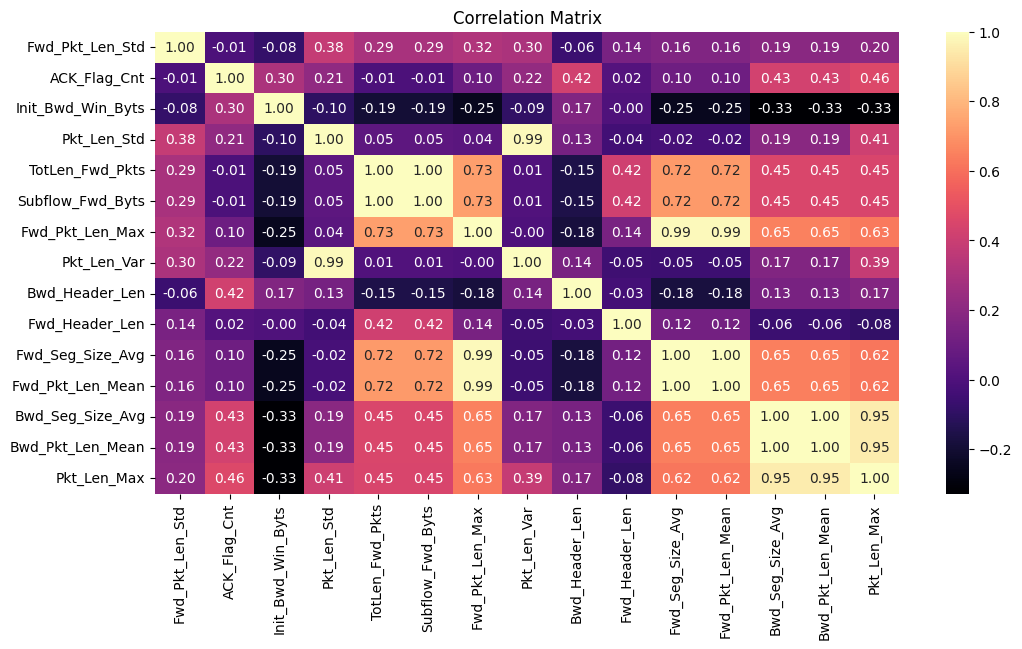

In [ ]:
# Heatmap to visualize correlations between features
plt.figure(figsize=(12, 6))
sns.heatmap(data_subset.corr(), annot=True, cmap='magma', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

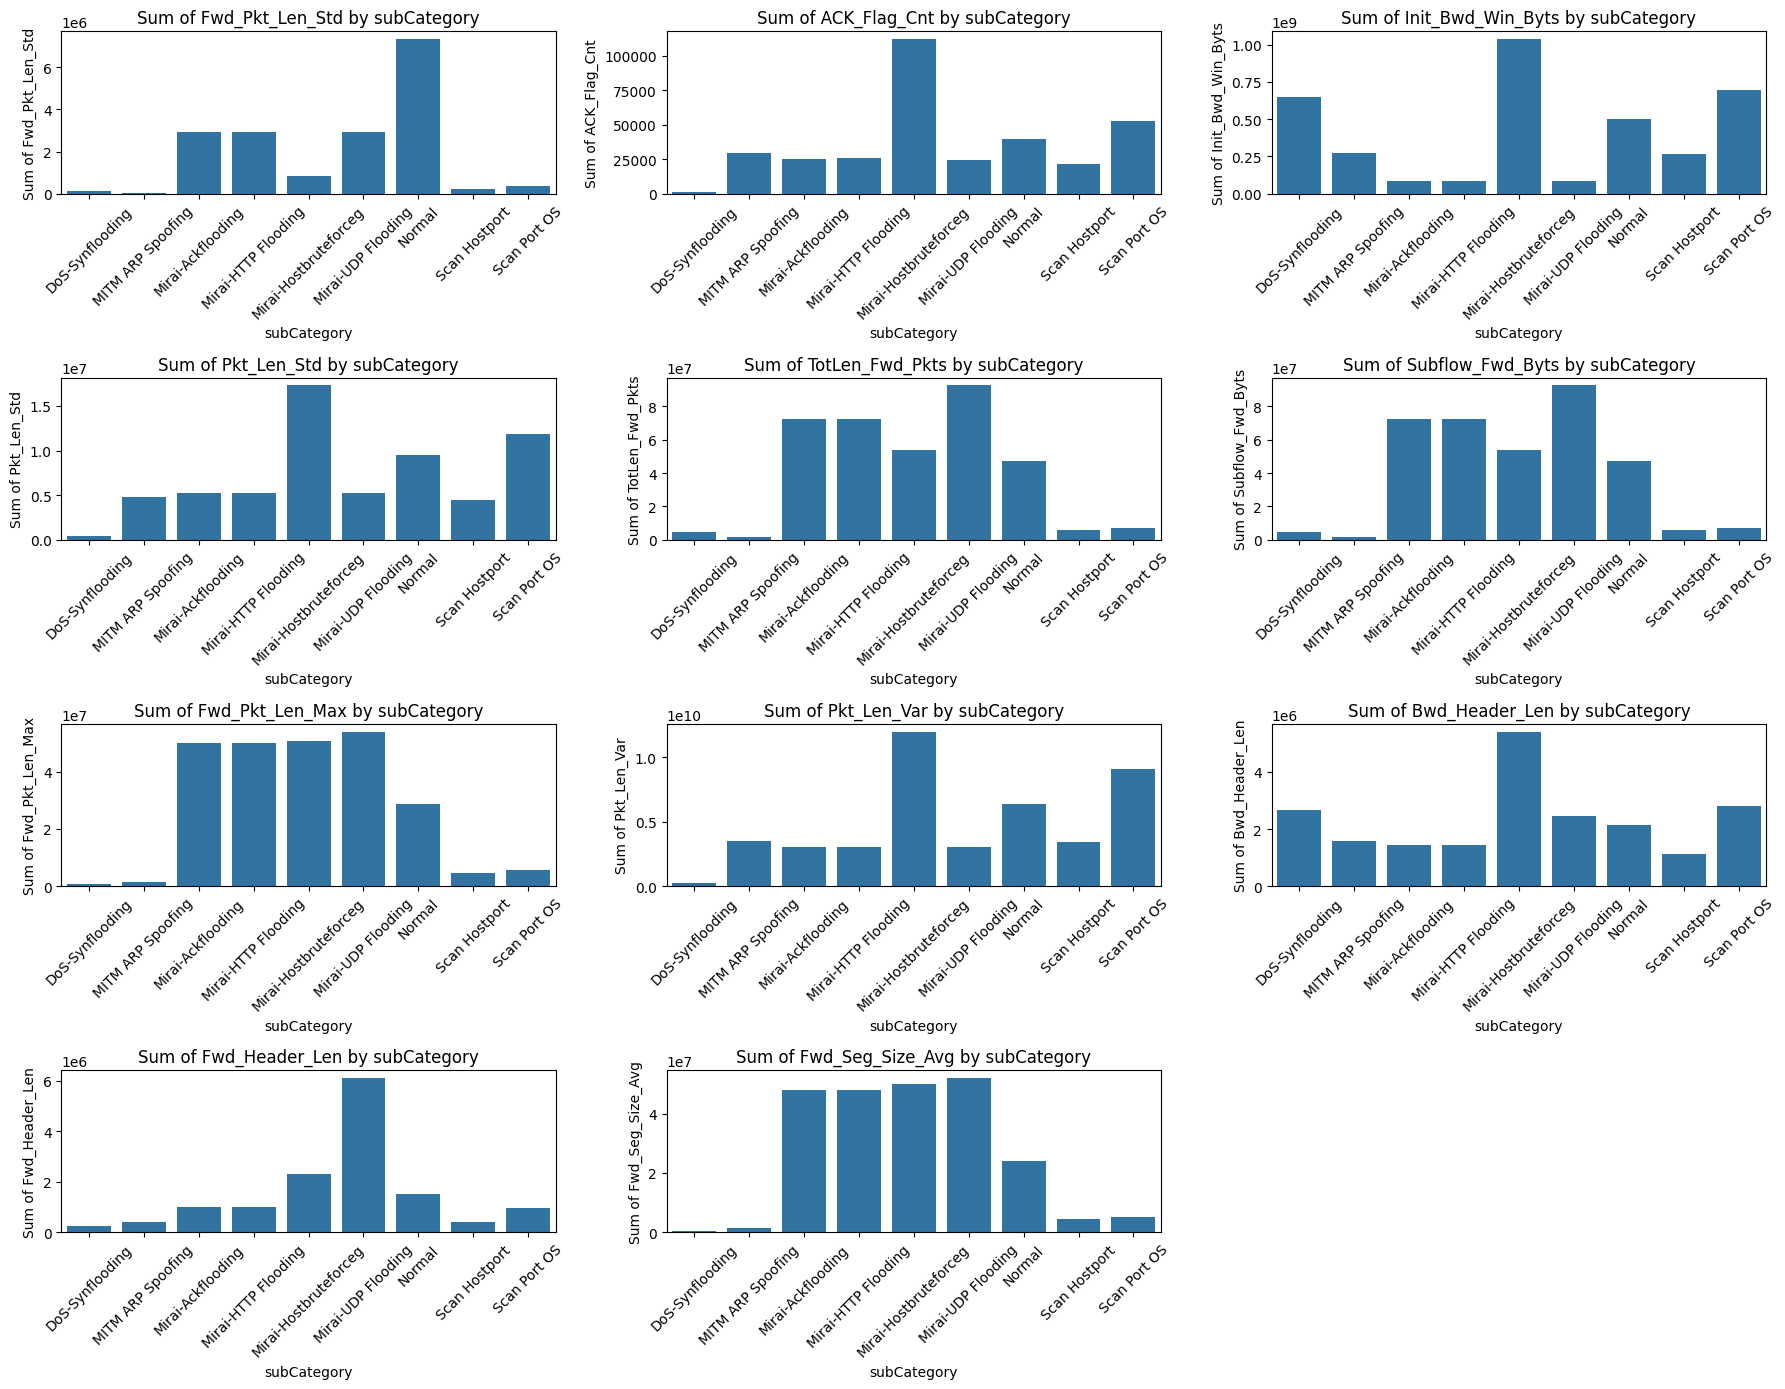

In [ ]:
# List of numerical columns
numerical_columns = ['Fwd_Pkt_Len_Std', 'ACK_Flag_Cnt', 'Init_Bwd_Win_Byts',
                     'Pkt_Len_Std', 'TotLen_Fwd_Pkts', 'Subflow_Fwd_Byts',
                     'Fwd_Pkt_Len_Max', 'Pkt_Len_Var', 'Bwd_Header_Len',
                     'Fwd_Header_Len', 'Fwd_Seg_Size_Avg']

# Create a new DataFrame containing only the specified numerical columns
numerical_df = df[numerical_columns]

# Sum the values for each numerical column by 'Sub_Cat'
sum_numerical_df = numerical_df.groupby(df['Sub_Cat']).sum()

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 14))
fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

# Plot each numerical column
for i, column in enumerate(numerical_columns):
    sns.barplot(data=sum_numerical_df, x=sum_numerical_df.index, y=column, ax=axes[i])
    axes[i].set_title(f'Sum of {column} by subCategory')
    axes[i].set_xlabel('subCategory')
    axes[i].set_ylabel(f'Sum of {column}')
    axes[i].tick_params(axis='x', rotation=45)

for i in range(len(numerical_columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### Min/Max scaling

In [ ]:
# Scale the data to range [0, 1]
dataframe = (dataframe.max() - dataframe) / (dataframe.max() - dataframe.min())
print("Done")

Done


In [ ]:
# Remove columns with all NaN values
print("Remove columns with NaN values ... ", end="")
null_cols = dataframe.columns[dataframe.isnull().all()].tolist()
dataframe = dataframe.drop(null_cols, axis=1)
print("Done")

Remove columns with NaN values ... Done


In [ ]:
nan_values = dataframe.isna().any()

# Print columns with NaN values
print("Columns with NaN values:")
print(nan_values[nan_values].index)

Columns with NaN values:
Index([], dtype='object')


### Y

In [ ]:
# Extract the labeling features from the dataframe
binary_labels = df.Label
category_labels = df.Cat
subcategory_labels = df.Sub_Cat
 # One-hot encode for the labels
print("One-hot encoding the labels ... ", end="")
binary_y = binary_labels.replace({"Normal": 0, "Anomaly": 1}).to_numpy(copy=True)
category_y = category_labels.replace({"Normal": 0, "Mirai": 1, "DoS": 2, "Scan": 3,
                                              "MITM ARP Spoofing": 4}).to_numpy(copy=True)
subcategory_y = subcategory_labels.replace(
            {"Normal": 0, "Mirai-Ackflooding": 1, "Mirai-Hostbruteforceg": 2, "Mirai-UDP Flooding": 3,
             "Mirai-HTTP Flooding": 4, "DoS-Synflooding": 5, "Scan Port OS": 6, "Scan Hostport": 7,
             "MITM ARP Spoofing": 8}).to_numpy(copy=True)
df["Label"] = binary_y
df["Cat"] = category_y
df["Sub_Cat"] = subcategory_y
print("Done")

One-hot encoding the labels ... Done


In [ ]:
dataframe

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Bwd_PSH_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,0.151055,0.847328,0.197266,0.845482,0.000000,0.415832,0.999250,0.994624,1.000000,0.991060,0.998151,0.329235,0.329235,0.329235,1.000000,0.023224,0.020548,0.020548,1.000000,0.992091,0.994671,0.999250,1.000000,0.999250,0.999250,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.0,1.0,0.997912,0.999554,0.996667,0.986667,0.327397,0.023224,0.122831,0.693151,0.905843,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.928571,0.122831,0.329235,0.020548,0.994624,0.991060,1.000000,0.998151,1.000000,0.994624,1.0,1.0,1.0,1.0,0.999250,1.000000,0.999250,0.999250
1,0.017749,0.966733,0.197266,0.991525,0.647059,0.940476,0.946892,0.994624,0.998211,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999891,0.973443,0.966697,0.957449,0.989437,1.000000,1.000000,1.0,1.000000,1.000000,0.946886,0.946886,1.00000,0.946886,0.946886,1.0,1.0,0.994781,0.997545,0.999953,0.999623,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.857143,1.000000,1.000000,1.000000,0.994624,1.000000,0.998211,1.000000,0.777206,1.000000,1.0,1.0,1.0,1.0,0.973443,0.966285,0.957449,0.989437
2,0.151055,0.195008,0.197266,0.862018,0.647059,0.540609,0.998590,1.000000,0.996422,1.000000,0.996371,1.000000,1.000000,1.000000,1.000000,0.051913,0.979452,0.359361,0.240546,0.995106,0.995749,0.999295,0.999990,0.999290,0.999300,1.000000,1.000000,1.0,1.000000,1.000000,0.998590,0.999295,0.99999,0.999290,0.999300,1.0,1.0,1.000000,0.994643,1.000000,0.978723,0.979452,0.051913,0.281849,0.194478,0.351134,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.000000,0.361644,1.000000,0.359361,1.000000,1.000000,0.996422,0.996371,0.971466,1.000000,1.0,1.0,1.0,1.0,0.999295,0.999989,0.999290,0.999300
3,0.151055,0.191389,0.197266,0.862018,0.647059,0.052394,0.998490,1.000000,0.998211,1.000000,0.996410,1.000000,1.000000,1.000000,1.000000,0.051913,0.049315,0.049315,1.000000,0.995479,0.997355,0.998490,1.000000,0.998490,0.998490,1.000000,1.000000,1.0,1.000000,1.000000,0.998490,0.998490,1.00000,0.998490,0.998490,1.0,1.0,1.000000,0.996429,1.000000,0.986755,0.049315,0.051913,0.049315,1.000000,1.000000,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.000000,0.049315,1.000000,0.049315,1.000000,1.000000,0.998211,0.996410,0.971466,1.000000,1.0,1.0,1.0,1.0,0.998490,1.000000,0.998490,0.998490
4,0.151055,0.438733,0.000000,0.970935,0.000000,0.000080,0.998470,0.989247,1.000000,0.991934,0.999457,0.691257,0.703552,0.697404,0.987671,0.713115,0.712329,0.712329,1.000000,0.997901,0.996082,0.999235,0.999990,0.999230,0.999240,0.999238,0.999226,1.0,0.999237,0.999226,1.000000,1.000000,1.00000,1.000000,1.000000,1.0,1.0,0.995825,0.999554,0.996732,0.993464,0.712329,0.691257,0.704452,0.981995,0.999676,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.737291,0.697404,0.712329,0.989247,0.991934,1.000000,0.999457,1.000000,0.989247,1.0,1.0,1.0,1.0,0.999235,0.999989,0.999230,0.999240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
data_path = dir_path + 'data_cleaned.csv'
# data_path = r'data/data_cleaned.csv'

df.to_csv(data_path, index=False)

In [ ]:
data_path = dir_path + 'x_cleaned.csv'
# data_path = r'data/x_cleaned.csv'

dataframe.to_csv(data_path, index=False)

# IV - Dimentionality Reduction

## PCA

### Calculate total variance

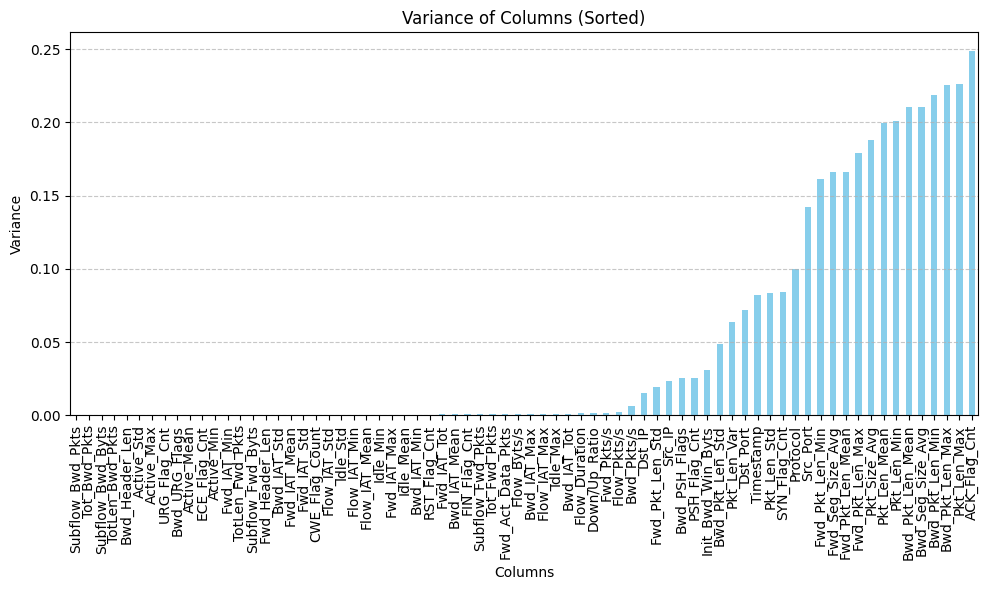

In [ ]:
# Calculate variances of each column
variances = dataframe.var()

# Sort variances in ascending order
sorted_variances = variances.sort_values()

# Plot sorted variances
plt.figure(figsize=(10, 6))
sorted_variances.plot(kind='bar', color='skyblue')
plt.title('Variance of Columns (Sorted)')
plt.xlabel('Columns')
plt.ylabel('Variance')
plt.xticks(rotation=90)  # Rotating labels vertically
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

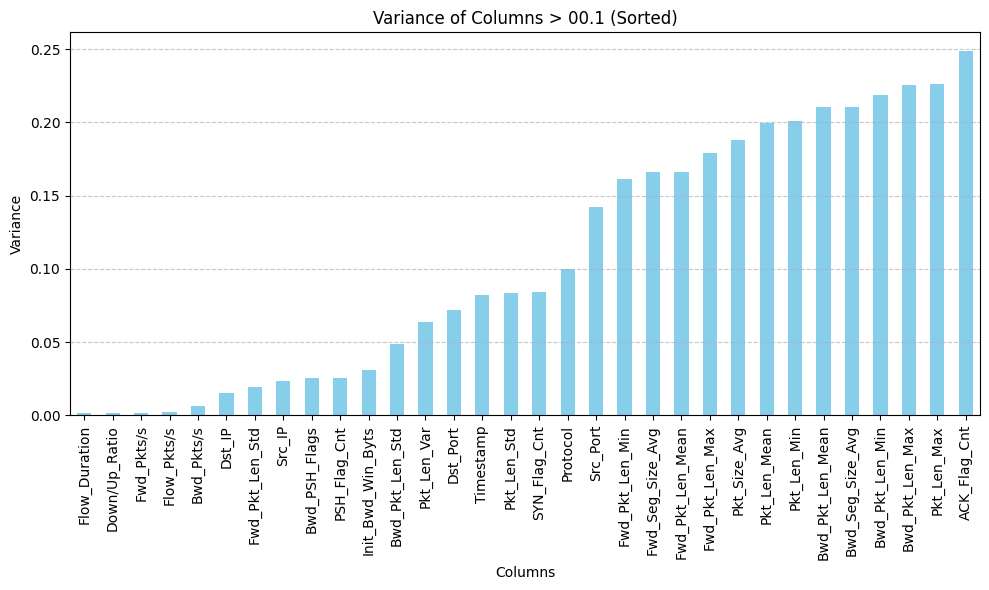

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate variances of each column
variances = dataframe.var()

# Sort variances in ascending order
sorted_variances = variances.sort_values()

# Filter variances greater than 00.1
filtered_variances = sorted_variances[sorted_variances > 0.001]

# Plot filtered variances
plt.figure(figsize=(10, 6))
filtered_variances.plot(kind='bar', color='skyblue')
plt.title('Variance of Columns > 00.1 (Sorted)')
plt.xlabel('Columns')
plt.ylabel('Variance')
plt.xticks(rotation=90)  # Rotating labels vertically
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### We notice that before performing any pca dimensionality reduction that the MAX variance represented by a column = 0.25 , and that aproximately only 32 columns contribute in the variance of the data . Then max number of pca eigenvectors for this data = 32 , min number of pca eigen vectors = 2

In [ ]:
# Filter original DataFrame based on columns with variances > 0.1
filtered_data = dataframe[filtered_variances.index]

# Display the new DataFrame
filtered_data

#drop Flow_ID, Src_IP, Dst_IP, Src_Port, Dst_Port, Timestamp

,Flow_Duration,Down/Up_Ratio,Fwd_Pkts/s,Flow_Pkts/s,Bwd_Pkts/s,Dst_IP,Fwd_Pkt_Len_Std,Src_IP,Bwd_PSH_Flags,PSH_Flag_Cnt,Init_Bwd_Win_Byts,Bwd_Pkt_Len_Std,Pkt_Len_Var,Dst_Port,Timestamp,Pkt_Len_Std,SYN_Flag_Cnt,Protocol,Src_Port,Fwd_Pkt_Len_Min,Fwd_Seg_Size_Avg,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Max,Pkt_Size_Avg,Pkt_Len_Mean,Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Seg_Size_Avg,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Max,Pkt_Len_Max,ACK_Flag_Cnt
0,0.999250,0.928571,0.996667,0.994671,0.986667,0.197266,1.000000,0.151055,1.0,1.0,1.000000,1.000000,0.905843,0.845482,0.415832,0.693151,1.0,0.000000,0.847328,0.329235,0.329235,0.329235,0.329235,0.122831,0.122831,0.327397,0.020548,0.020548,0.020548,0.023224,0.023224,1.0
1,0.946892,0.857143,0.999953,0.999891,0.999623,0.197266,1.000000,0.017749,1.0,1.0,0.777206,1.000000,1.000000,0.991525,0.940476,1.000000,0.0,0.647059,0.966733,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.998590,1.000000,1.000000,0.995749,0.978723,0.197266,1.000000,0.151055,1.0,1.0,0.971466,0.240546,0.351134,0.862018,0.540609,0.194478,1.0,0.647059,0.195008,1.000000,1.000000,1.000000,1.000000,0.361644,0.281849,0.979452,0.359361,0.359361,0.979452,0.051913,0.051913,0.0
3,0.998490,1.000000,1.000000,0.997355,0.986755,0.197266,1.000000,0.151055,1.0,1.0,0.971466,1.000000,1.000000,0.862018,0.052394,1.000000,1.0,0.647059,0.191389,1.000000,1.000000,1.000000,1.000000,0.049315,0.049315,0.049315,0.049315,0.049315,0.049315,0.051913,0.051913,0.0
4,0.998470,1.000000,0.996732,0.996082,0.993464,0.000000,0.987671,0.151055,1.0,1.0,1.000000,1.000000,0.999676,0.970935,0.000080,0.981995,1.0,0.000000,0.438733,0.703552,0.697404,0.697404,0.691257,0.737291,0.704452,0.712329,0.712329,0.712329,0.712329,0.713115,0.691257,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,0.997230,0.928571,0.999097,0.998560,0.996390,0.123541,1.000000,0.151055,1.0,1.0,1.000000,1.000000,1.000000,0.876964,0.415837,1.000000,1.0,0.000000,0.143328,0.987705,0.987705,0.987705,0.987705,0.987671,0.987671,0.987671,0.987671,0.987671,0.987671,0.987705,0.987705,1.0
625779,0.983417,1.000000,1.000000,0.999763,0.998794,0.197266,1.000000,0.018253,1.0,1.0,0.777206,1.000000,1.000000,0.991525,0.940502,1.000000,0.0,0.647059,0.930229,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
625780,0.999230,0.928571,0.996753,0.994809,0.987013,0.197266,1.000000,0.151055,1.0,1.0,0.501343,1.000000,1.000000,0.862018,0.540582,1.000000,1.0,0.647059,0.194824,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
625781,0.997600,1.000000,0.997917,0.997504,0.995833,0.197266,1.000000,0.151055,1.0,1.0,0.971466,1.000000,1.000000,0.238439,0.999974,1.000000,1.0,0.647059,0.862290,0.051913,0.051913,0.051913,0.051913,0.154947,0.049315,0.049315,0.049315,0.049315,0.049315,0.051913,0.051913,0.0


In [ ]:
dataframe

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Bwd_PSH_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,0.151055,0.847328,0.197266,0.845482,0.000000,0.415832,0.999250,0.994624,1.000000,0.991060,0.998151,0.329235,0.329235,0.329235,1.000000,0.023224,0.020548,0.020548,1.000000,0.992091,0.994671,0.999250,1.000000,0.999250,0.999250,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.0,1.0,0.997912,0.999554,0.996667,0.986667,0.327397,0.023224,0.122831,0.693151,0.905843,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.928571,0.122831,0.329235,0.020548,0.994624,0.991060,1.000000,0.998151,1.000000,0.994624,1.0,1.0,1.0,1.0,0.999250,1.000000,0.999250,0.999250
1,0.017749,0.966733,0.197266,0.991525,0.647059,0.940476,0.946892,0.994624,0.998211,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999891,0.973443,0.966697,0.957449,0.989437,1.000000,1.000000,1.0,1.000000,1.000000,0.946886,0.946886,1.00000,0.946886,0.946886,1.0,1.0,0.994781,0.997545,0.999953,0.999623,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.857143,1.000000,1.000000,1.000000,0.994624,1.000000,0.998211,1.000000,0.777206,1.000000,1.0,1.0,1.0,1.0,0.973443,0.966285,0.957449,0.989437
2,0.151055,0.195008,0.197266,0.862018,0.647059,0.540609,0.998590,1.000000,0.996422,1.000000,0.996371,1.000000,1.000000,1.000000,1.000000,0.051913,0.979452,0.359361,0.240546,0.995106,0.995749,0.999295,0.999990,0.999290,0.999300,1.000000,1.000000,1.0,1.000000,1.000000,0.998590,0.999295,0.99999,0.999290,0.999300,1.0,1.0,1.000000,0.994643,1.000000,0.978723,0.979452,0.051913,0.281849,0.194478,0.351134,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.000000,0.361644,1.000000,0.359361,1.000000,1.000000,0.996422,0.996371,0.971466,1.000000,1.0,1.0,1.0,1.0,0.999295,0.999989,0.999290,0.999300
3,0.151055,0.191389,0.197266,0.862018,0.647059,0.052394,0.998490,1.000000,0.998211,1.000000,0.996410,1.000000,1.000000,1.000000,1.000000,0.051913,0.049315,0.049315,1.000000,0.995479,0.997355,0.998490,1.000000,0.998490,0.998490,1.000000,1.000000,1.0,1.000000,1.000000,0.998490,0.998490,1.00000,0.998490,0.998490,1.0,1.0,1.000000,0.996429,1.000000,0.986755,0.049315,0.051913,0.049315,1.000000,1.000000,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.000000,0.049315,1.000000,0.049315,1.000000,1.000000,0.998211,0.996410,0.971466,1.000000,1.0,1.0,1.0,1.0,0.998490,1.000000,0.998490,0.998490
4,0.151055,0.438733,0.000000,0.970935,0.000000,0.000080,0.998470,0.989247,1.000000,0.991934,0.999457,0.691257,0.703552,0.697404,0.987671,0.713115,0.712329,0.712329,1.000000,0.997901,0.996082,0.999235,0.999990,0.999230,0.999240,0.999238,0.999226,1.0,0.999237,0.999226,1.000000,1.000000,1.00000,1.000000,1.000000,1.0,1.0,0.995825,0.999554,0.996732,0.993464,0.712329,0.691257,0.704452,0.981995,0.999676,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.737291,0.697404,0.712329,0.989247,0.991934,1.000000,0.999457,1.000000,0.989247,1.0,1.0,1.0,1.0,0.999235,0.999989,0.999230,0.999240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

### Perform PCA

In [ ]:
preprocessed_data = dataframe.to_numpy()

cov_matrix = np.cov(preprocessed_data, rowvar=False)
# Calculate the sum of the main diagonal elements
diagonal_sum = np.trace(cov_matrix)

print("Sum of Main Diagonal Elements - Total variance captured by the data :", diagonal_sum)

Sum of Main Diagonal Elements - Total variance captured by the data : 3.4427851180349616


In [ ]:
print("Applying PCA to preprocessed data ... ", end="")
pca = PCA()
pca.fit(preprocessed_data)
pca_features = pca.transform(preprocessed_data)

num_pca_features = pca_features.shape[1]
print("Number of PCA Features:", num_pca_features)
print("Done")

Applying PCA to preprocessed data ... Number of PCA Features: 72
Done


In [ ]:
# Get the eigenvalues
eigenvalues = pca.explained_variance_

# Get the sum of eigenvalues
sum_eigenvalues = np.sum(eigenvalues)

print("Eigenvalues:", eigenvalues)
print("Sum of Eigenvalues:", sum_eigenvalues)

Eigenvalues: [2.03790616e+00 4.42830005e-01 2.81252309e-01 2.05223862e-01
 1.62019276e-01 6.47267792e-02 5.61269474e-02 4.87987980e-02
 3.73564606e-02 2.01756365e-02 1.75902435e-02 1.32015867e-02
 1.01748951e-02 9.32251349e-03 7.45194043e-03 6.82479505e-03
 5.43839791e-03 4.44516874e-03 2.37998754e-03 1.40739174e-03
 1.15598306e-03 1.02557783e-03 9.59927567e-04 6.89745397e-04
 5.41974849e-04 4.75908333e-04 4.65900404e-04 4.14966619e-04
 3.78040281e-04 3.69532055e-04 2.69956080e-04 2.17200931e-04
 2.01785960e-04 1.88543433e-04 1.44287741e-04 1.02757279e-04
 9.92450714e-05 9.33636720e-05 5.69161251e-05 5.25737209e-05
 5.05213565e-05 4.55995768e-05 3.63534643e-05 2.10765545e-05
 1.97411201e-05 1.33665570e-05 1.00897232e-05 7.46900617e-06
 5.85511519e-06 4.85548561e-06 4.42884714e-06 2.64520993e-06
 1.82306377e-06 1.49187333e-06 1.02927590e-06 4.03362397e-07
 2.72096208e-07 1.95453491e-07 1.72107967e-07 1.32626981e-07
 8.18782802e-08 7.80352465e-08 5.27462040e-08 4.47751284e-08
 1.33510647

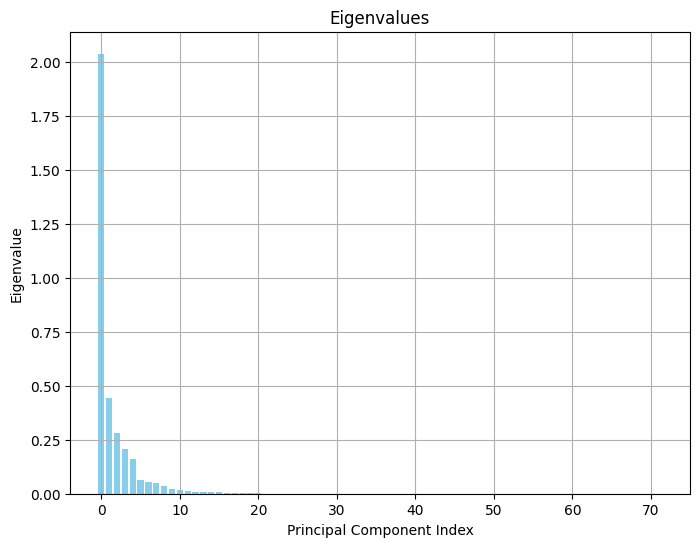

Sum of Eigenvalues: 3.442785118034964


In [ ]:
import matplotlib.pyplot as plt


# Plot the eigenvalues
plt.figure(figsize=(8, 6))
plt.bar(range(len(eigenvalues)), eigenvalues, color='skyblue')
plt.title('Eigenvalues')
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

# Print the sum of eigenvalues
print("Sum of Eigenvalues:", sum_eigenvalues)

#### we conclude that despite the error is approximately 0 but we still didn t achieve our dimensionality reduction goal , based on this graph we can conclude that only the first 14-15 eigen values capture all the variance of the data, then number of pca componenets must be changed

#### Scree plot as a proof of our conclusion:

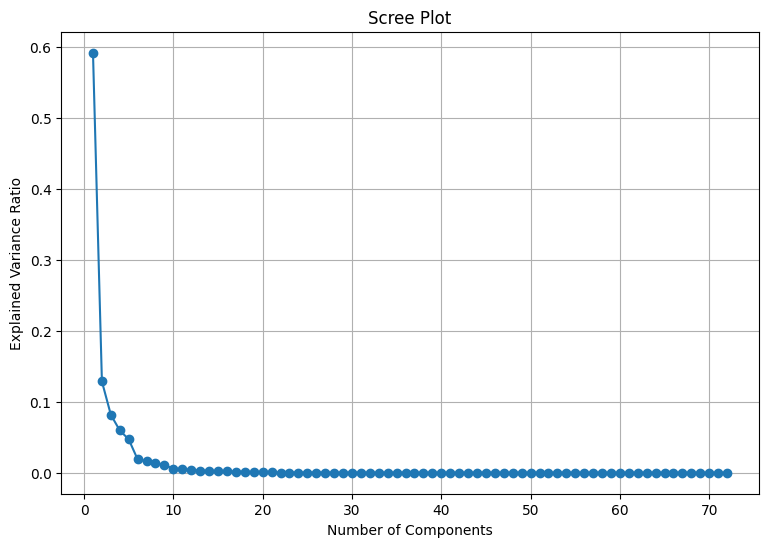

In [ ]:
# Plotting the scree plot
plt.figure(figsize=(9, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

### LDA

In [ ]:
print("Applying LDA to preprocessed data based on Label column... ", end="")
lda_label = LinearDiscriminantAnalysis()
lda_label.fit(preprocessed_data, df['Label'])
lda_features_label = lda_label.transform(preprocessed_data)
print("Done")
print(lda_features_label)

Applying LDA to preprocessed data based on Label column... Done
[[ 0.78772014]
 [ 0.07780769]
 [-1.09328415]
 ...
 [-0.51197248]
 [-4.65029719]
 [ 0.49596845]]


In [ ]:
print("Applying LDA to preprocessed data based on Category column... ", end="")
lda_category = LinearDiscriminantAnalysis()
lda_category.fit(preprocessed_data, df['Cat'])
lda_features_category = lda_category.transform(preprocessed_data)
print("Done")
print(lda_features_category)

Applying LDA to preprocessed data based on Category column... Done
[[-2.87537687 -2.12245298  0.29908583  1.75825583]
 [25.09439745  0.61527825 -0.10577725 -1.16896629]
 [-2.07683571  2.86314317 -0.17095477 -1.48994132]
 ...
 [-2.24326841  2.75643787  0.67554598 -1.21584952]
 [-1.2487033   6.89710251 -2.44120123  0.63942495]
 [-3.08637055 -2.25402655 -0.34622806  1.12456015]]


In [ ]:
print("Applying LDA to preprocessed data based on Subcategory column... ", end="")
lda_subcategory = LinearDiscriminantAnalysis()
lda_subcategory.fit(preprocessed_data, df['Sub_Cat'])
lda_features_subcategory = lda_subcategory.transform(preprocessed_data)
print("Done")
print(lda_features_subcategory)

Applying LDA to preprocessed data based on Subcategory column... Done
[[  3.95709237   0.32248335   1.42540973 ...  -0.49592922  -0.66594801
   -0.81960742]
 [-26.39633819   9.30322539  -1.58525828 ...   1.13150813  -0.43812038
   -1.79161469]
 [ -0.17853518  -3.66776297  -1.71620379 ...   1.15958833  -0.4544357
    0.18508939]
 ...
 [ -0.14319295  -3.82131393  -1.4578023  ...   0.9247459   -0.90769795
    0.33163727]
 [ -9.75651551 -12.14704021  -0.59452872 ...  -0.34884731   0.15438775
    0.37962823]
 [  3.43027743  -0.37439557   1.94673448 ...   0.95766415   0.1865384
    0.249115  ]]


### PCA + LDA

#### Get Top 14 LDA columns

In [ ]:
# Get the coefficients of the linear discriminant function
feature_coefficients = lda_label.coef_[0]

# Create a dictionary to associate each feature name with its coefficient
feature_coefficients_dict = dict(zip(dataframe.columns, feature_coefficients))

# Calculate the absolute values of the coefficients
abs_feature_coefficients_dict = {feature: abs(coef) for feature, coef in feature_coefficients_dict.items()}

# Sort the coefficients by their absolute values
sorted_abs_coefficients = sorted(abs_feature_coefficients_dict.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and absolute coefficients for plotting
feature_names_sorted = [item[0] for item in sorted_abs_coefficients]
abs_coefficients_sorted = [item[1] for item in sorted_abs_coefficients]

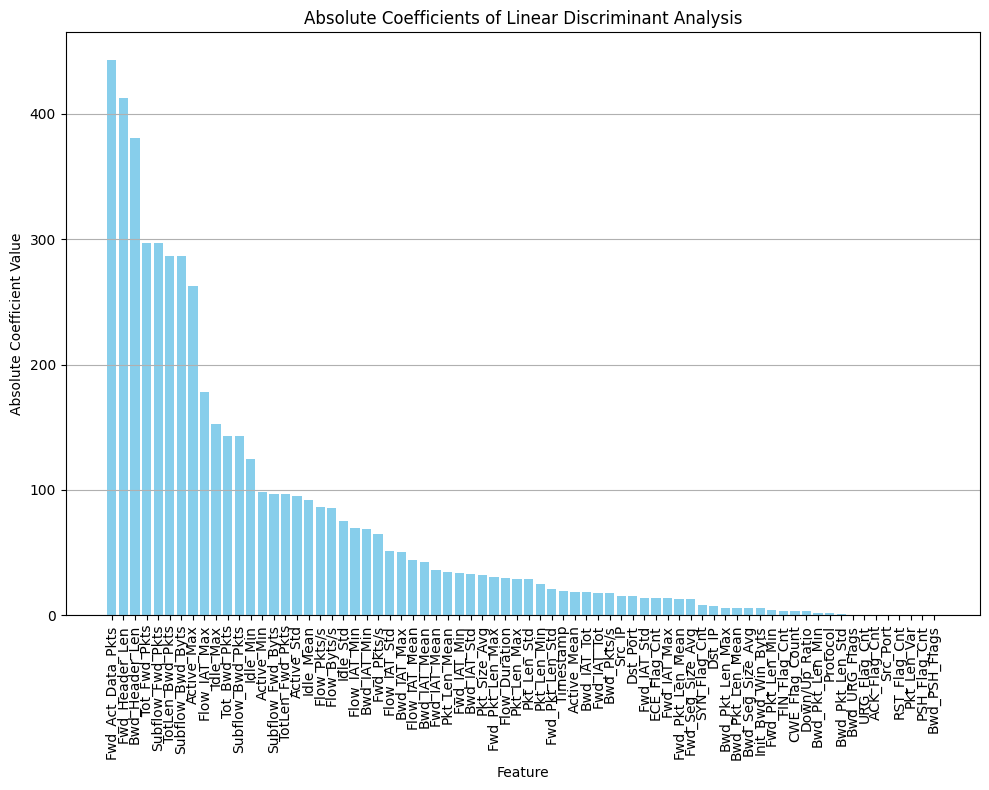

In [ ]:
# Plot the bar chart
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(feature_names_sorted)), abs_coefficients_sorted, color='skyblue')
plt.xticks(np.arange(len(feature_names_sorted)), feature_names_sorted, rotation=90)
plt.ylabel('Absolute Coefficient Value')
plt.xlabel('Feature')
plt.title('Absolute Coefficients of Linear Discriminant Analysis')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

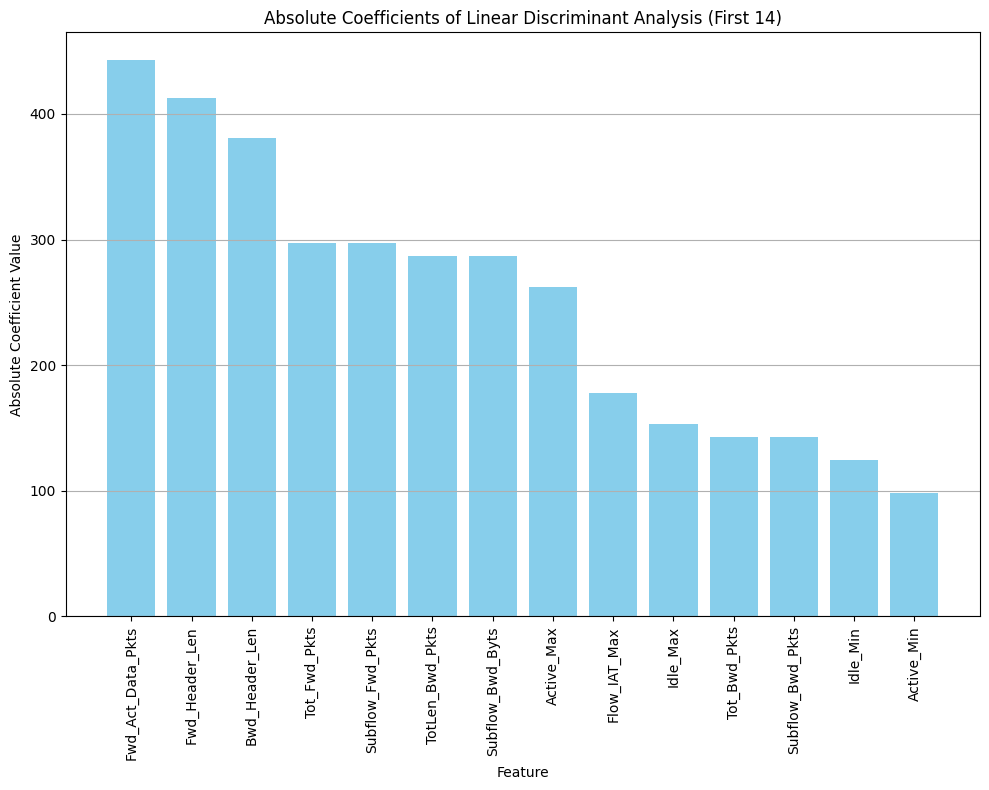

In [ ]:
# Plot the bar chart
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(feature_names_sorted[:14])), abs_coefficients_sorted[:14], color='skyblue')
plt.xticks(np.arange(len(feature_names_sorted[:14])), feature_names_sorted[:14], rotation=90)
plt.ylabel('Absolute Coefficient Value')
plt.xlabel('Feature')
plt.title('Absolute Coefficients of Linear Discriminant Analysis (First 14)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Extract the top 14 feature names
top_14_feature_names = [item[0] for item in sorted_abs_coefficients[:14]]

# Create a DataFrame with the top 14 feature names
top_14_features_df = pd.DataFrame({'Feature Name': top_14_feature_names})

top_14_features_df

,Feature Name
0,Fwd_Act_Data_Pkts
1,Fwd_Header_Len
2,Bwd_Header_Len
3,Tot_Fwd_Pkts
4,Subflow_Fwd_Pkts
5,TotLen_Bwd_Pkts
6,Subflow_Bwd_Byts
7,Active_Max
8,Flow_IAT_Max
9,Idle_Max


#### Get Top 30 PCA columns

In [ ]:
# Calculate the covariance matrix
cov_matrix = np.cov(preprocessed_data, rowvar=False)

# Perform eigendecomposition on the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort the eigenvalues in descending order and get their indices
sorted_indices = np.argsort(eigenvalues)[::-1]

# Get the indices of the top 30 eigenvalues
top_30_indices = sorted_indices[:30]

# Get the corresponding eigenvectors (principal components)
top_30_eigenvectors = eigenvectors[:, top_30_indices]

# Get the names of the features corresponding to the top 14 eigenvectors
top_30_feature_names = dataframe.columns[top_30_indices]


top_30_components_df = pd.DataFrame({'Feature Name': top_30_feature_names})

print("DataFrame with the top 30 feature names:")
top_30_components_df

DataFrame with the top 30 feature names:


,Feature Name
0,Idle_Min
1,Idle_Max
2,Idle_Std
3,Idle_Mean
4,Active_Min
5,Active_Max
6,Active_Std
7,Active_Mean
8,Fwd_Act_Data_Pkts
9,Init_Bwd_Win_Byts


#### Get common columns to use for PCA and LDA

In [ ]:
# Merge the DataFrames on the 'Feature Name' column to find common elements
common_features_df = pd.merge(top_30_components_df, top_14_features_df, on='Feature Name')

common_features_df


,Feature Name
0,Idle_Min
1,Idle_Max
2,Active_Min
3,Active_Max
4,Fwd_Act_Data_Pkts
5,Subflow_Bwd_Byts
6,Subflow_Bwd_Pkts
7,Subflow_Fwd_Pkts


### Combine Top 11 PCA features with Top 5 LDA features

In [ ]:
top_11_pca = top_30_components_df[:11]['Feature Name'].to_list()
top_5_lda = top_14_features_df[:5]['Feature Name'].to_list()
combined_15_features = list(set(top_11_pca) | (set(top_5_lda)))
len(combined_15_features)

15

In [ ]:
preprocessed_15 = dataframe[combined_15_features].to_numpy()
pca = PCA()
pca.fit(preprocessed_15)
pca_top_15 = pca.transform(preprocessed_15)
pca_top_15.shape

(625783, 15)

#### Perform PCA and LDA

#### We will define a function that performs PCA with a given number of components followed by LDA to avoid redundancy in our code

In [ ]:
def perform_pca_lda(y, X=pca_features, n_components=72):
  pca_data = X[:, :n_components]

  lda = LinearDiscriminantAnalysis()
  lda.fit(pca_data, y)
  pca_lda_data = lda.transform(pca_data)

  return pca_lda_data

In [ ]:
def print_pca_lda_results(pca_lda_data):
  print("Shape of transformed data:", pca_lda_data.shape)

  print("Transformed data:")
  print(pca_lda_data)

We will call this function in the next files during model training while trying to determine the best combination of PCA features and LDA y variable